In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import EWdata

def ma(x, n):
    #return np.convolve(x, np.ones((n,))/n, mode='valid')
    x = np.array(x)
    size = x.shape[0]
    ma_vals = []
    for i in range(size):
        if i < n:
            ma_vals.append( np.mean(x[:i+1]) )
        else:
            ma_vals.append( np.mean(x[i+1-n:i+1]))
    return np.array(ma_vals)

## Non-random distribution

### $k_{peak}$ and $k_{mean}$ of the spectrum

In [19]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
BINS = 120

ids = range(16, 4000, 50)

time = []
peak_k = []
ave_k = [] # average k value computed form radial spectrum
mean_k = [] # average k value computed from original Cartesian k space values.
for i in ids:
    file_path = os.path.join(root_path, 'non_random_bubbles', 'spec_data', 'nr_1_bfield_'+str(i)+'.npy')
    arr = np.load(file_path)
    if arr[0,-1] == arr[1,-1]:
        kmean = arr[0,-1]
        vals_k = arr[0, :-1]
        mag = arr[1, :-1]
    else:
        vals_k = arr[0]
        mag = arr[1]
    time.append(i)
    peak_k.append( vals_k[np.argmax(mag)] )
    ave_k.append( np.average(vals_k, weights = mag) )
    mean_k.append( kmean )
time = np.array(time)
peak_k = np.array(peak_k)
ave_k = np.array(ave_k)
mean_k = np.array(mean_k)

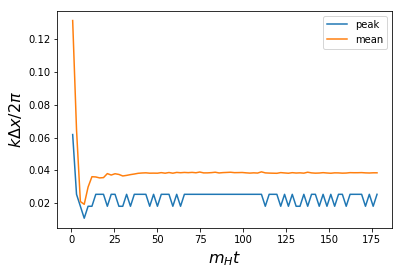

In [20]:
plt.plot(time*c1.dt()*c1.mH(), peak_k, label = 'peak')
#plt.plot(time*c1.dt()*c1.mH(), ave_k, label = 'mean_radial')
plt.plot(time*c1.dt()*c1.mH(), mean_k, label = 'mean')
plt.xlabel('$m_Ht$', fontsize = 16)
plt.ylabel('$k\Delta x/2\pi$', fontsize = 16)
plt.legend()
plt.show()

### $k_{mean}$ for some configurations

In [ ]:
con

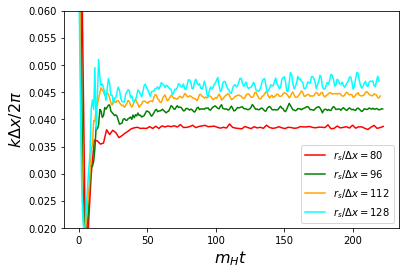

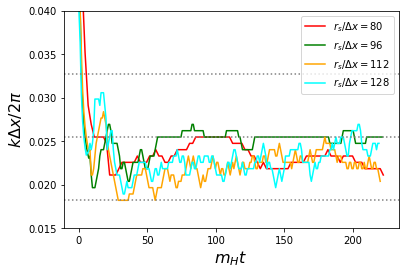

In [34]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
BINS = 120
MA = 10

#config_prefix = ['nr_1_bfield_', 'nr_2_bfield_', 'nr_3_bfield_', 'nr_4_bfield_',
#                 'nr_11_bfield_', 'nr_12_bfield_', 'nr_13_bfield_', 'nr_14_bfield_']
#config_id = [range(16, 5000, 50), range(48, 5000, 20), range(80, 5000, 20), range(112, 5000, 20),
#             range(16, 1500, 50), range(48, 1500, 50), range(80, 1500, 50), range(112, 1500, 50)]
#config_label = ['$r_s/\Delta x=80$', '$r_s/\Delta x=96$', '$r_s/\Delta x=112$', '$r_s/\Delta x=128$'] + ['']*4
#config_line = ['-']*4 + ['--']*4
#config_color = ['r','g','orange','cyan']*2

config_prefix = ['nr_1_bfield_', 'nr_2_bfield_', 'nr_3_bfield_', 'nr_4_bfield_']
config_id = [range(16, 5000, 50), range(48, 5000, 20), range(80, 5000, 20), range(112, 5000, 20)]
config_label = ['$r_s/\Delta x=80$', '$r_s/\Delta x=96$', '$r_s/\Delta x=112$', '$r_s/\Delta x=128$']
config_line = ['-']*4
config_color = ['r','g','orange','cyan']

fig1 = plt.figure(1)
fig2 = plt.figure(2)

for prefix, ids, lbl, line, color in zip(config_prefix, config_id, config_label, config_line, config_color):
    time = []
    peak_k = []
    mean_k = [] # average k value computed from original Cartesian k space values.
    for i in ids:
        file_path = os.path.join(root_path, 'non_random_bubbles', 'spec_data', prefix+str(i)+'.npy')
        arr = np.load(file_path)
        if arr[0,-1] == arr[1,-1]:
            kmean = arr[0,-1]
            vals_k = arr[0, :-1]
            mag = arr[1, :-1]
        else:
            vals_k = arr[0]
            mag = arr[1]
        time.append(i)
        peak_k.append( vals_k[np.argmax(mag)] )
        mean_k.append( kmean )
    
    time = np.array(time)
    adj_time = time - time[0]
    peak_k = np.array(peak_k)
    mean_k = np.array(mean_k)
    ma_peak = ma(peak_k, MA)
    plt.figure(1)
    plt.plot(adj_time*c1.dt()*c1.mH(), mean_k, 
             label = lbl,
             linestyle = line,
             c = color)
    plt.figure(2)
    #plt.plot(adj_time*c1.dt()*c1.mH(), peak_k, label = '$r_s/\Delta x=$'+str(sep))
    plt.plot(adj_time*c1.dt()*c1.mH(), ma_peak, 
             label = lbl,
             linestyle = line,
             c = color)

plt.figure(1)
plt.xlabel('$m_Ht$', fontsize = 16)
plt.ylabel('$k\Delta x/2\pi$', fontsize = 16)
plt.ylim([0.02, 0.06])
plt.legend()

plt.figure(2)
plt.xlabel('$m_Ht$', fontsize = 16)
plt.ylabel('$k\Delta x/2\pi$', fontsize = 16)
for v in vals_k[2:7]:
    plt.axhline(v, linestyle = 'dotted', c ='grey')
plt.ylim([0.015, 0.04])
plt.legend()
plt.show()